In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
%config Application.log_level="INFO"
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [4]:
import os, sys, glob

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
# matplotlib settings

# expecially for presentation, larger font settings for plotting are recommendable
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 26

plt.rc("font", size=MEDIUM_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (8,5) # the standard figure size

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 4
plt.rcParams["lines.markeredgewidth"]=1

In [8]:
import postprocessing

# Evaluation

In [9]:
glob.glob("E01*")

['E01_smd_1_SDS_on_AU_111.surfactant_pulled.ti.force.BAK',
 'E01_smd_1_SDS_on_AU_111.sf_com_sb_com_dist_z.runave.traj',
 'E01_smd_1_SDS_on_AU_111.surfactant_pulled.ti.count',
 'E01_smd_1_SDS_on_AU_111.sf_com_sb_com_dist.runave.traj',
 'E01_smd_1_SDS_on_AU_111.surfactant_pulled.ti.count.BAK',
 'E01_smd_1_SDS_on_AU_111.colvars.traj',
 'E01_smd_1_SDS_on_AU_111.surfactant_pulled.ti.force',
 'E01_smd_1_SDS_on_AU_111.surfactant_pulled.ti.pmf',
 'E01_smd_1_SDS_on_AU_111.surfactant_pulled.ti.pmf.BAK',
 'E01_smd_1_SDS_on_AU_111.colvars.state']

## Potential of Mean Force

In [10]:
with open('E01_smd_1_SDS_on_AU_111.surfactant_pulled.ti.pmf','r') as pmf_infile:
    print(pmf_infile.read())

#       xi            A(xi)
         0       26.276911540567
         1       26.276911540567
         2       26.276911540567
         3       26.276911540567
         4       26.276911540567
         5       26.276911540567
         6                     0
         7       13.298168595545
         8       25.404870776698
         9       35.200982392651
        10       44.026002095207
        11       53.282925173823
        12       51.001676752503
        13       55.075754373043
        14       68.735448435798
        15       76.989135488508
        16       96.960705441838
        17        132.6424037002
        18       166.36416973021
        19       166.36416973021
        20       166.36416973021



In [11]:
pmf_file_name = 'E01_smd_1_SDS_on_AU_111.surfactant_pulled.ti.pmf'

In [12]:
pmf_nd = np.loadtxt(pmf_file_name)

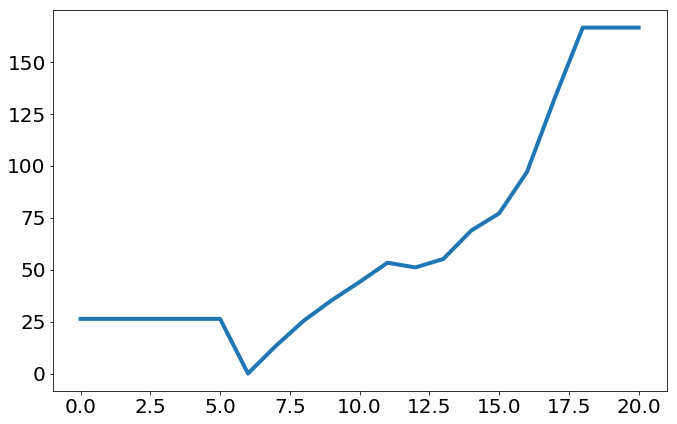

In [13]:
plt.plot(pmf_nd[:,0],pmf_nd[:,1])

In [14]:
pmf_df = postprocessing.read_data_with_hashed_header(pmf_file_name)

In [15]:
pmf_df.head()

,xi,A(xi)
0,0,26.276912
1,1,26.276912
2,2,26.276912
3,3,26.276912
4,4,26.276912


In [16]:
pmf_df.set_index('xi',inplace=True)

In [17]:
pmf_df.head()

,A(xi)
xi,
0,26.276912
1,26.276912
2,26.276912
3,26.276912
4,26.276912


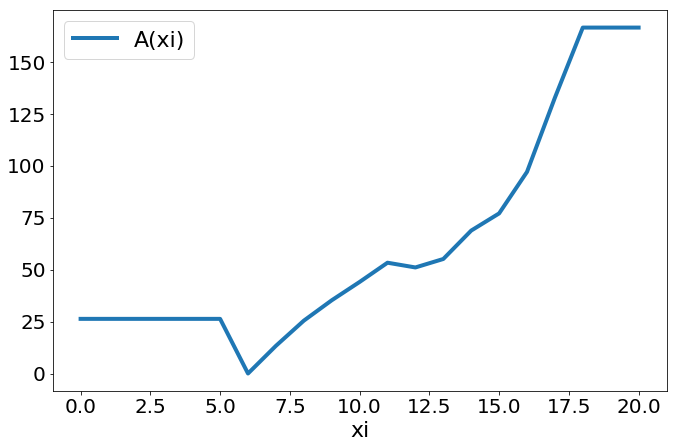

In [18]:
pmf_df.plot()

## TI Force

In [19]:
ti_force_file_name = 'E01_smd_1_SDS_on_AU_111.surfactant_pulled.ti.force'

In [20]:
with open(ti_force_file_name,'r') as f:
    for i in range(10):
        print(f.readline(),end='')

# 1
#          0         1        20  0

 0.5  0
 1.5  0
 2.5  0
 3.5  0
 4.5  0
 5.5  26.2769
 6.5  -13.2982


In [21]:
ti_force_df = postprocessing.read_data_with_hashed_header(ti_force_file_name)

In [22]:
ti_force_df.head()

,1
0.5,0.0
1.5,0.0
2.5,0.0
3.5,0.0
4.5,0.0


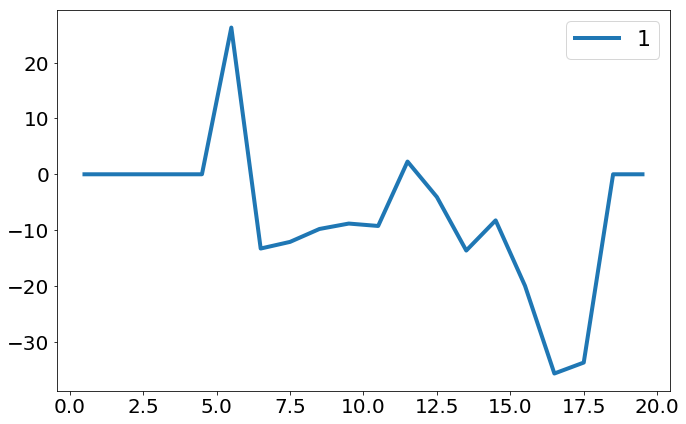

In [23]:
ti_force_df.plot()

## TI Counts

In [24]:
ti_count_file_name = 'E01_smd_1_SDS_on_AU_111.surfactant_pulled.ti.count'

In [25]:
with open(ti_count_file_name,'r') as f:
    for i in range(10):
        print(f.readline(),end='')

# 1
#          0         1        20  0

 0.5  0
 1.5  0
 2.5  0
 3.5  0
 4.5  0
 5.5  35909
 6.5  3659


In [26]:
ti_count_df = pd.read_csv(ti_count_file_name,
            names=['xi','N'],
            index_col=0,
            comment='#',delimiter='\s*',header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/pandas/io/parsers.py:2227: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/usr/lib/python3/dist-packages/pandas/io/parsers.py:2229: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


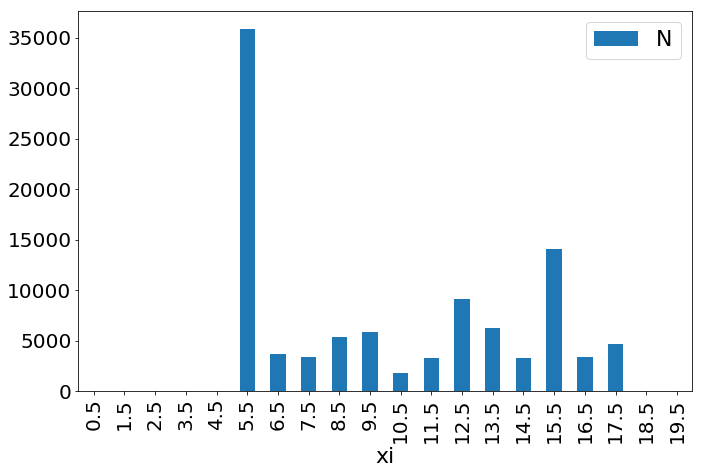

In [27]:
ti_count_df.plot(kind='bar')

## Colvars Trajectory

In [28]:
cv_traj_file_name = 'E01_smd_1_SDS_on_AU_111.colvars.traj'

In [29]:
with open(cv_traj_file_name,'r') as f:
    for i in range(4):
        print(f.readline(),end='')

# step         sf_com_sb_com_dist    v_sf_com_sb_com_dist  ft_sf_com_sb_com_dist fa_sf_com_sb_com_dist  sf_com_sb_com_dist_z  v_sf_com_sb_com_dist_ ft_sf_com_sb_com_dist fa_sf_com_sb_com_dist  E_surfactant_pulled   x0_sf_com_sb_com_dist W_surfactant_pulled  
           0    7.59246673870487e+00  0.00000000000000e+00  0.00000000000000e+00  0.00000000000000e+00   5.37045650075041e+00  0.00000000000000e+00  0.00000000000000e+00 -8.05568475112561e+01   2.16313522698392e+02  0.00000000000000e+00  0.00000000000000e+00
          10    7.54430854114926e+00 -1.37168995636427e-03 -2.09082883684493e+01  0.00000000000000e+00   5.34853879916488e+00 -8.01996014050399e-04 -2.88287954476001e+01 -8.01980819874732e+01   2.14391078482316e+02  2.00000000000000e-03 -1.60778428541671e-01
          20    7.50701529148155e+00 -4.13463066835762e-03 -1.74252441435125e+01  0.00000000000000e+00   5.31601859520147e+00 -3.62314174015399e-03 -2.53236005698165e+01 -7.96802789280220e+01   2.11631561668246e+02  4.00000

In [30]:
cv_traj_df = postprocessing.read_data_with_hashed_header(cv_traj_file_name)

In [31]:
cv_traj_df.head()

,step,sf_com_sb_com_dist,v_sf_com_sb_com_dist,ft_sf_com_sb_com_dist,fa_sf_com_sb_com_dist,sf_com_sb_com_dist_z,v_sf_com_sb_com_dist_,ft_sf_com_sb_com_dist.1,fa_sf_com_sb_com_dist.1,E_surfactant_pulled,x0_sf_com_sb_com_dist,W_surfactant_pulled
0,0,7.592467,0.000000,0.000000,0.0,5.370457,0.000000,0.000000,-80.556848,216.313523,0.000,0.000000
1,10,7.544309,-0.001372,-20.908288,0.0,5.348539,-0.000802,-28.828795,-80.198082,214.391078,0.002,-0.160778
2,20,7.507015,-0.004135,-17.425244,0.0,5.316019,-0.003623,-25.323601,-79.680279,211.631562,0.004,-0.320795
3,30,7.431695,-0.002548,-2.822360,0.0,5.240655,-0.003210,-10.591928,-78.519821,205.512075,0.006,-0.478825
4,40,7.368742,-0.003493,23.726538,0.0,5.166672,-0.003883,23.352406,-77.380074,199.589196,0.008,-0.634662


In [32]:
cv_traj_df.set_index('step',inplace=True)

In [33]:
cv_traj_df.head()

,sf_com_sb_com_dist,v_sf_com_sb_com_dist,ft_sf_com_sb_com_dist,fa_sf_com_sb_com_dist,sf_com_sb_com_dist_z,v_sf_com_sb_com_dist_,ft_sf_com_sb_com_dist.1,fa_sf_com_sb_com_dist.1,E_surfactant_pulled,x0_sf_com_sb_com_dist,W_surfactant_pulled
step,,,,,,,,,,,
0,7.592467,0.000000,0.000000,0.0,5.370457,0.000000,0.000000,-80.556848,216.313523,0.000,0.000000
10,7.544309,-0.001372,-20.908288,0.0,5.348539,-0.000802,-28.828795,-80.198082,214.391078,0.002,-0.160778
20,7.507015,-0.004135,-17.425244,0.0,5.316019,-0.003623,-25.323601,-79.680279,211.631562,0.004,-0.320795
30,7.431695,-0.002548,-2.822360,0.0,5.240655,-0.003210,-10.591928,-78.519821,205.512075,0.006,-0.478825
40,7.368742,-0.003493,23.726538,0.0,5.166672,-0.003883,23.352406,-77.380074,199.589196,0.008,-0.634662


### Distances

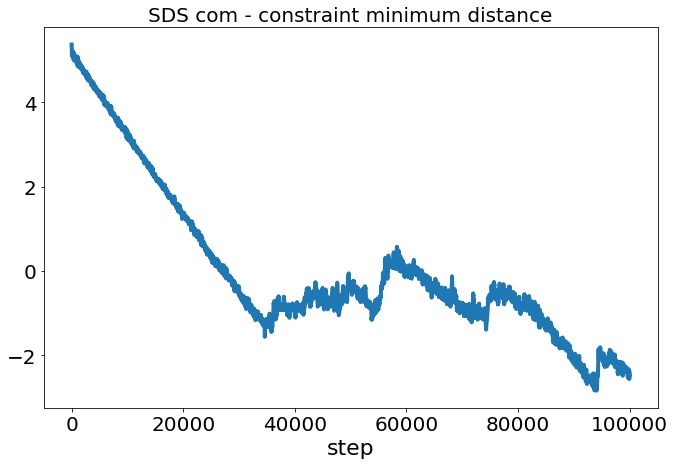

In [34]:
(cv_traj_df['sf_com_sb_com_dist_z']-cv_traj_df['x0_sf_com_sb_com_dist']).plot(
    title='SDS com - constraint minimum distance')


/usr/lib/python3/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


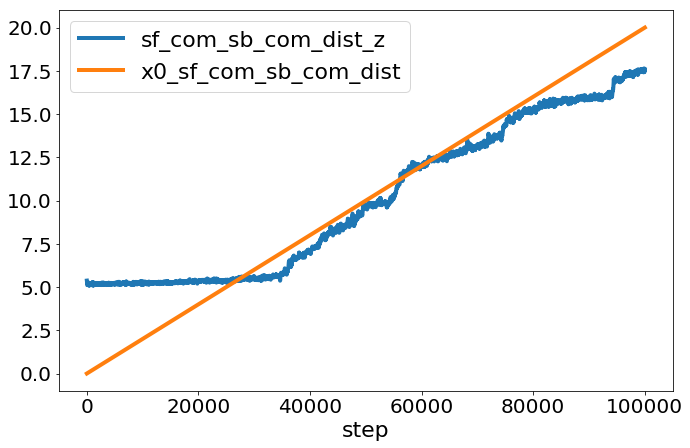

In [35]:
cv_traj_df.plot(y=['sf_com_sb_com_dist_z','x0_sf_com_sb_com_dist'])

In [36]:
cv_traj_df.columns

Index(['sf_com_sb_com_dist', 'v_sf_com_sb_com_dist', 'ft_sf_com_sb_com_dist',
       'fa_sf_com_sb_com_dist', 'sf_com_sb_com_dist_z',
       'v_sf_com_sb_com_dist_', 'ft_sf_com_sb_com_dist.1',
       'fa_sf_com_sb_com_dist.1', 'E_surfactant_pulled',
       'x0_sf_com_sb_com_dist', 'W_surfactant_pulled'],
      dtype='object')

### Velocity

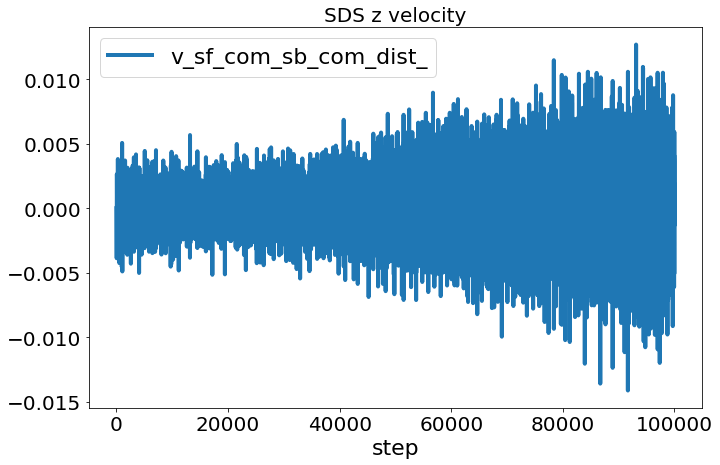

In [37]:
cv_traj_df.plot(y='v_sf_com_sb_com_dist_', title='SDS z velocity')

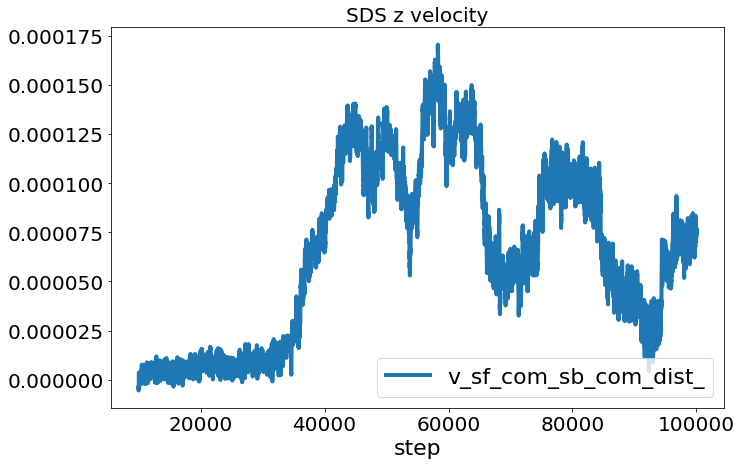

In [39]:
cv_traj_df.rolling(1000).mean().plot(y='v_sf_com_sb_com_dist_', title='SDS z velocity')

### Forces

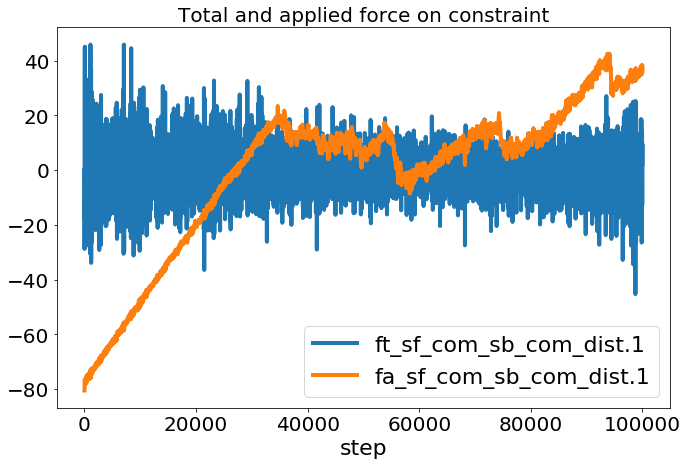

In [40]:
cv_traj_df.plot(
    y=['ft_sf_com_sb_com_dist.1','fa_sf_com_sb_com_dist.1'], 
    title='Total and applied force on constraint')

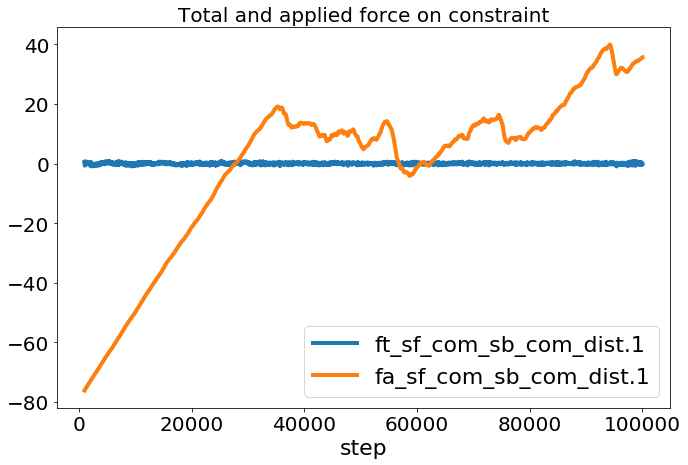

In [41]:
cv_traj_df.rolling(100).mean().plot(
    y=['ft_sf_com_sb_com_dist.1','fa_sf_com_sb_com_dist.1'], 
    title='Total and applied force on constraint')

### Energy & Work

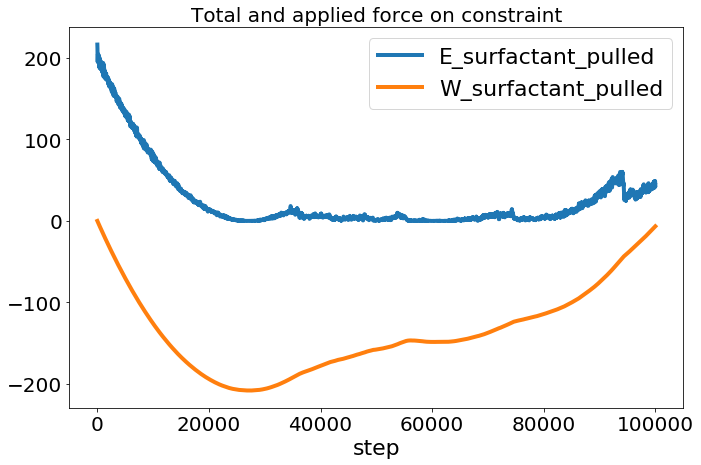

In [42]:
cv_traj_df.plot(
    y=['E_surfactant_pulled','W_surfactant_pulled'], 
    title='Total and applied force on constraint')

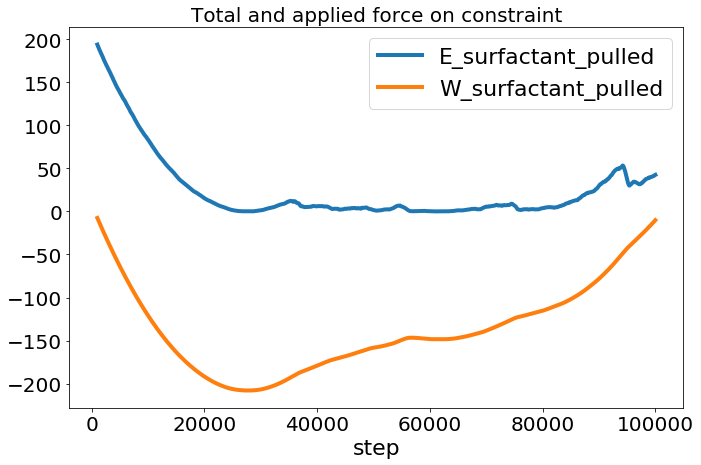

In [43]:
cv_traj_df.rolling(100).mean().plot(
    y=['E_surfactant_pulled','W_surfactant_pulled'], 
    title='Total and applied force on constraint')

## Running average 

In [44]:
runave_traj_file_name = 'E01_smd_1_SDS_on_AU_111.sf_com_sb_com_dist_z.runave.traj'

In [45]:
with open(runave_traj_file_name,'r') as f:
    for i in range(4):
        print(f.readline(),end='')

# step         running average       running stddev       
          10    5.36038095138903e+00  1.56359175734767e-02
          11    5.89512899390955e+00  1.83254809112319e-01
          12    5.89267345941990e+00  1.82585848028992e-01


In [46]:
runave_traj_df = pd.read_csv(runave_traj_file_name,
            names=['step','running average','running stddev'],
            index_col=0,
            comment='#',delimiter='\s*',header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/pandas/io/parsers.py:2227: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/usr/lib/python3/dist-packages/pandas/io/parsers.py:2229: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [47]:
runave_traj_df.head()

,running average,running stddev
step,,
10,5.360381,0.015636
11,5.895129,0.183255
12,5.892673,0.182586
13,5.890197,0.181940
14,5.887777,0.181499


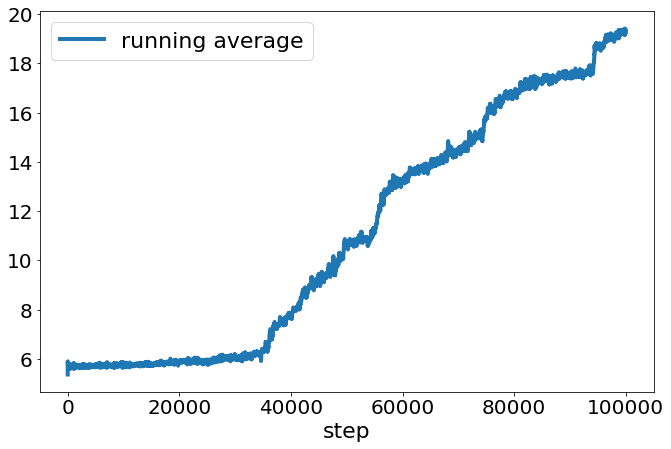

In [48]:
runave_traj_df.plot(y='running average')

In [49]:
len(runave_traj_df)

99991

In [55]:
interval = 10000
errlimits = [*[False]*(interval-1), True]*int(len(runave_traj_df)/interval) \
    + [ False ]* (len(runave_traj_df) % interval)

In [56]:
np.where(errlimits)

(array([ 9999, 19999, 29999, 39999, 49999, 59999, 69999, 79999, 89999]),)

In [57]:
len(errlimits)

99991

<ErrorbarContainer object of 3 artists>

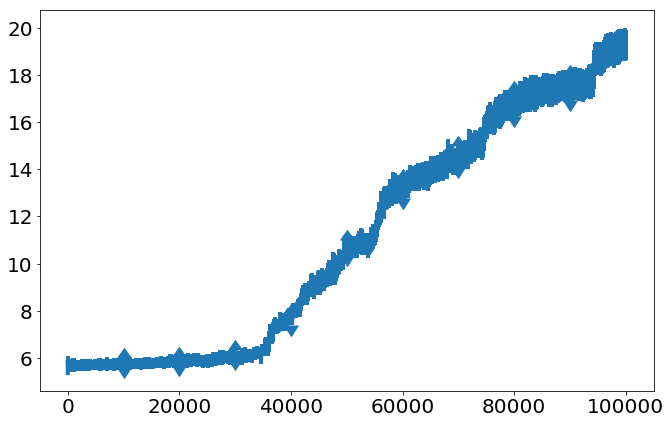

In [58]:
plt.errorbar(
    x=runave_traj_df.index,
    y=runave_traj_df['running average'],
    yerr=runave_traj_df['running stddev'],
    xerr=None,
    uplims = errlimits, lolims = errlimits)